## Detect fake profiles in online social networks using Support Vector Machine

In [1]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import gender_guesser.detector as gender
#from sklearn.preprocessing import Inputer
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Function for reading dataset from csv files

In [2]:
def read_datasets():
    legit = pd.read_csv("DATASET/users.csv")
    fake = pd.read_csv("DATASET/fusers.csv")
    
    x=pd.concat([legit,fake])
    y=len(fake)*[0] + len(legit)*[1]
    return x,y

### function for predicting sex using name of person

In [3]:
def predict_sex(name):
    name = str(name)
    sex_predictor = gender.Detector(case_sensitive=False)
    first_name = name.split(' ')[0]
    sex = sex_predictor.get_gender(first_name)
    sex_dict = {'female': -2, 'mostly_female': -1, 'unknown': 0, 'mostly_male': 1, 'male': 2}
    sex_code = sex_dict[sex]
    return sex_code

### function for feature engineering

In [4]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))
    lang_dict = {name:i for i, name in lang_list}
    x.loc[:,'lang_code'] = x['lang'].map(lambda x: lang_dict[x]).astype(int)
    x.loc[:,'sex_code'] = predict_sex(x['name'])
    feature_columns_to_use = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'sex_code', 'lang_code' ]
    x=x.loc[:,feature_columns_to_use]
    return x

### function for ploting learning curve

In [5]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlable("Training examples")
    plt.ylable("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

### function for plotting confusion matrix

In [6]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Legit']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plot.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True lable')
    plt.xlabel('Predicted label')

### function for plotting ROC curve

In [7]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print("False Positive rate: ", false_positive_rate)
    print("True Positive rate: ", true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### function for training data using Support Vector Machine

In [8]:
def train(X_train, y_train, X_test):
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    Cs = 10.0 ** np.arange(-2,3,.5)
    gammas = 10.0 ** np.arange(-2,3,.5)
    param = [{'gamma': gammas, 'C':Cs}]
    cvk = StratifiedKFold(y_train, n_folds=5)
    classifier = SVC()
    clf = GridSearchCV(classifier,param_grid=param,cv=cvk)
    clf.fit(X_train,y_train)
    print("The best classifier is: ", clf.best_estimator_)
    clf.best_estimator_.fit(X_train, y_train)
    
    scores = cross_validation.cross_val_score(clf.best_estimator_, X_train, y_train, cv=5)
    print(scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (SVM, rbf kernel, $\gamma=%.6f$)' %clf.best_estimator_.gamma
    plot_learning_curve(clf.best_estimator_, title, X_train, y_train, cv=5)
    plt.show()
    
    y_pred = clf.best_estimator_.predict(X_test)
    return y_test, y_pred

In [9]:
def train_randomforest(X_train, y_train, X_test):
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    Cs = 10.0 ** np.arange(-2,3,.5)
    gammas = 10.0 ** np.arange(-2,3,.5)
    param = [{'gamma': gammas, 'C':Cs}]
    cvk = StratifiedKFold(y_train, n_folds=5)
    classifier = SVC()
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    print("The best classifier is: ", clf.best_estimator_)
    clf.best_estimator_.fit(X_train, y_train)
    
    scores = cross_validation.cross_val_score(clf.best_estimator_, X_train, y_train, cv=5)
    print(scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (SVM, rbf kernel, $\gamma=%.6f$)' %clf.best_estimator_.gamma
    plot_learning_curve(clf.best_estimator_, title, X_train, y_train, cv=5)
    plt.show()
    
    y_pred = clf.best_estimator_.predict(X_test)
    return y_test, y_pred

In [10]:
print("reading datasets...\n")
x,y = read_datasets()

reading datasets...



In [11]:
print("extracting features...\n")
x = extract_features(x)
print(x.columns)
print(x.describe())

extracting features...

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'sex_code', 'lang_code'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count  sex_code    lang_code  
count   2818.000000    2818.0  2818.000000  
mean       2.818666       0.0     2.851313  
std       23.

In [12]:
x.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,sex_code,lang_code
0,20370,5470,2385,145,52,0,5
1,3131,506,381,9,40,0,1
2,4024,264,87,323,16,0,1
3,40586,640,622,1118,32,0,1
4,2016,62,64,13,0,0,5


AttributeError: 'list' object has no attribute 'head'

In [14]:
print("spliting datasets in train and test dataset...\n")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=44)

spliting datasets in train and test dataset...



In [18]:
X_test.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,sex_code,lang_code
512,9950,658,701,18,11,0,5
630,6991,1001,614,2401,6,0,5
189,1809,102,392,18,1,0,5
343,770,42,149,28,0,0,5
793,20,18,317,0,0,0,1


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
random_forest = RandomForestClassifier(n_estimators=100)

In [16]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = random_forest.predict(X_test)

In [18]:
random_forest.score(X_test, y_test)

0.9432624113475178

False Positive rate:  [0.         0.00746269 1.        ]
True Positive rate:  [0.         0.89864865 1.        ]


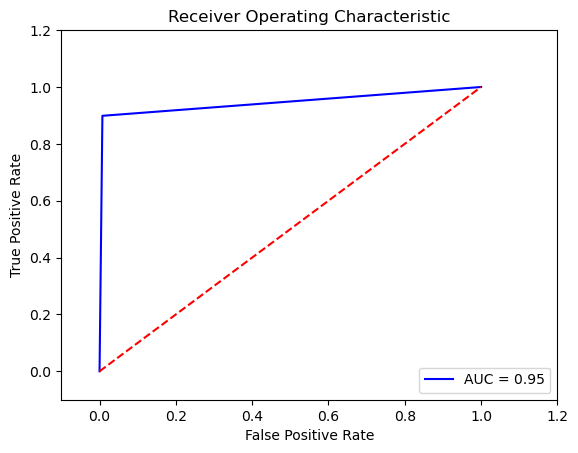

In [19]:
plot_roc_curve(y_test, y_pred)

In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
print(cnf_matrix)

[[266   2]
 [ 30 266]]


<AxesSubplot:>

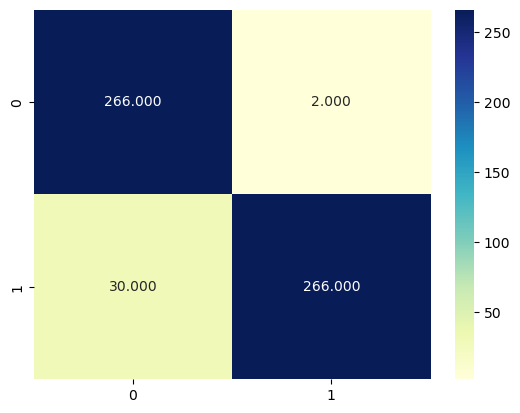

In [22]:
import seaborn as sns
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)

## Deep Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
model = Sequential([
    Dense(units=16, input_dim=7, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,565
Trainable params: 1,565
Non-trainabl

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train, y_train, batch_size=7, epochs=5)

Epoch 1/5
322/322 [==============================] - 1s 1ms/step - loss: 16.0725 - accuracy: 0.8079
Epoch 2/5
322/322 [==============================] - 0s 1ms/step - loss: 14.5467 - accuracy: 0.8452
Epoch 3/5
322/322 [==============================] - 0s 976us/step - loss: 7.3957 - accuracy: 0.8469
Epoch 4/5
322/322 [==============================] - 0s 1ms/step - loss: 6.6994 - accuracy: 0.8886
Epoch 5/5
322/322 [==============================] - 0s 1ms/step - loss: 5.3492 - accuracy: 0.8651


In [29]:
X_test = np.array(X_test)
y_test = np.array(y_test)
score = model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 5.5801 - accuracy: 0.8723


In [30]:
print(score)

result_dnn = score[1]
print(result_dnn)

[5.580066680908203, 0.8723404407501221]
0.8723404407501221


In [31]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

18/18 [==============================] - 0s 826us/step


False Positive rate:  [0.         0.01865672 0.01865672 0.0261194  0.0261194  0.02985075
 0.02985075 0.03731343 0.03731343 0.04104478 0.04104478 0.04477612
 0.04477612 0.04850746 0.04850746 0.05223881 0.05223881 0.05597015
 0.05597015 0.05970149 0.05970149 0.05970149 0.05970149 0.06343284
 0.06343284 0.06716418 0.06716418 0.07089552 0.07089552 0.07462687
 0.07462687 0.08208955 0.08208955 0.0858209  0.0858209  0.10447761
 0.10447761 0.10820896 0.10820896 0.1119403  0.1119403  0.1119403
 0.12313433 0.12313433 0.13059701 0.13059701 0.1380597  0.1380597
 0.14179104 0.14179104 0.14925373 0.14925373 0.16791045 0.16791045
 0.17537313 0.17537313 0.23507463 0.23507463 0.31716418 0.31716418
 0.32462687 0.32462687 0.33955224 0.33955224 0.37686567 0.37686567
 0.39179104 0.39179104 0.41044776 0.41044776 0.43656716 0.43656716
 0.51119403 0.51119403 0.51492537 0.51492537 0.51865672 0.51865672
 0.53731343 0.53731343 0.55223881 0.55223881 0.61940299 0.61940299
 0.63432836 0.63432836 0.74626866 0.746268

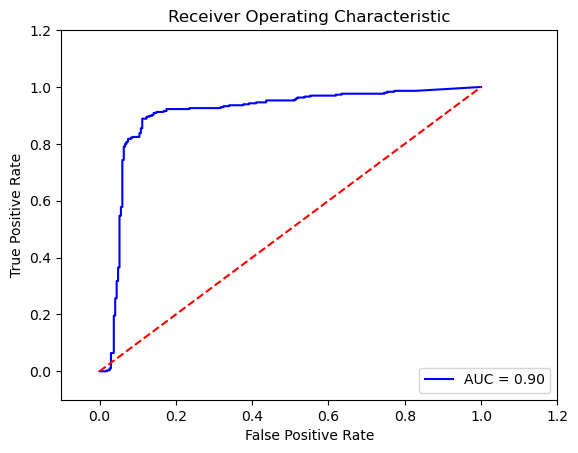

In [32]:
plot_roc_curve(y_test, y_pred)

In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [34]:
print(cnf_matrix)

[[221  47]
 [ 25 271]]


<AxesSubplot:>

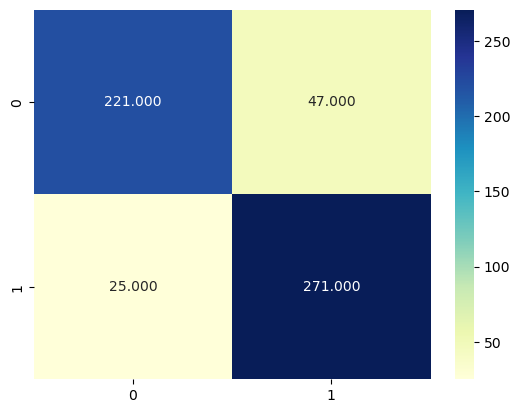

In [35]:
import seaborn as sns
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)

## Logistic Regression

In [38]:
from sklearn.naive_bayes import GaussianNB 

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [39]:
naive_bayes_classifier_pred = naive_bayes_classifier.predict(X_test)

In [40]:
naive_bayes_classifier.score(X_test, y_test)

0.6117021276595744

False Positive rate:  [0.         0.79850746 1.        ]
True Positive rate:  [0.         0.98310811 1.        ]


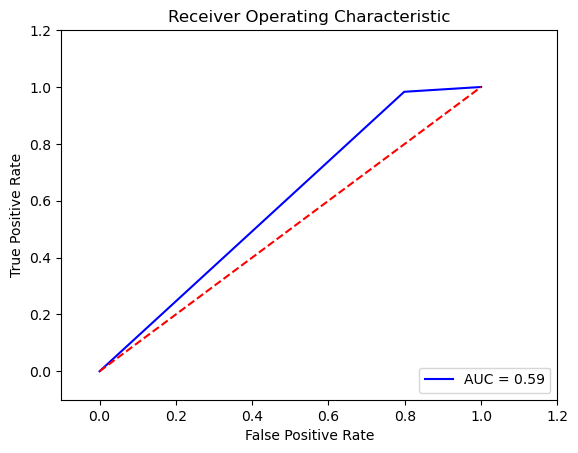

In [41]:
plot_roc_curve(y_test, naive_bayes_classifier_pred)

In [42]:
cnf_matrix = confusion_matrix(y_test, naive_bayes_classifier_pred.round())
print(cnf_matrix)

[[ 54 214]
 [  5 291]]


<AxesSubplot:>

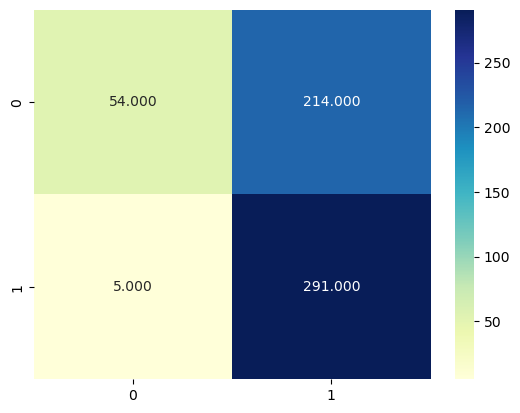

In [43]:
import seaborn as sns
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)

## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
classifier_pred = Tree_classifier.predict(X_test)

In [46]:
Tree_classifier.score(X_test, y_test)

0.9024822695035462

False Positive rate:  [0.        0.1119403 1.       ]
True Positive rate:  [0.         0.91554054 1.        ]


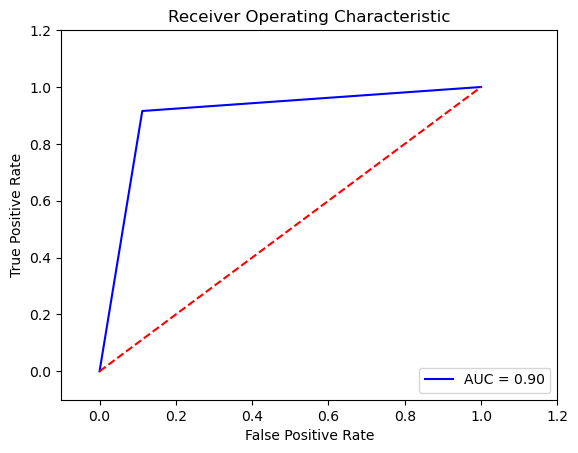

In [47]:
plot_roc_curve(y_test, classifier_pred)

In [48]:
cnf_matrix = confusion_matrix(y_test, classifier_pred.round())
print(cnf_matrix)

[[238  30]
 [ 25 271]]


<AxesSubplot:>

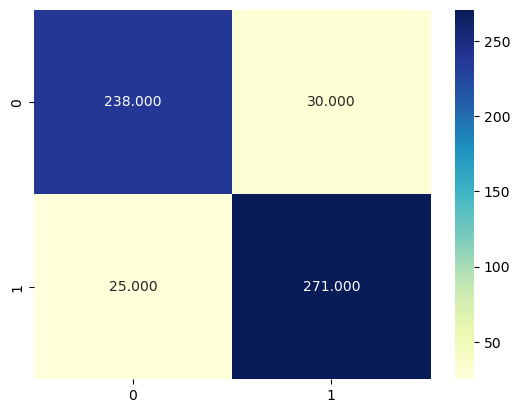

In [49]:
import seaborn as sns
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)

# Selecting best suitable model to predict fake profiles on twitter

## 1. Random Forest Classifier has shown better accuracy.
## 2. Random Forest Classifier AUC = 0.95



In [53]:
import pickle

filename = 'bestmodel.sav'
pickle.dump(random_forest.predict, open(filename, 'wb'))

#Loading the model
loaded_model = pickle.load(open('bestmodel.sav', 'rb'))

In [55]:
#Testing the Loaded Model
input_data = (24, 4, 588, 16, 0, 0, 1)
np_arr = np.asarray(input_data)
arr_reshape = np_arr.reshape(1,-1)

prediction = loaded_model(arr_reshape)

print(prediction)

if (prediction[0] == 0):
    print('The account is legit')
else:
    print('The account is fake')

[1]
The account is fake


C:\Users\punit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
input_data = (20370, 5470, 2385, 145, 52, 2, 5)
np_arr = np.asarray(input_data)
arr_reshape = np_arr.reshape(1,-1)

prediction = loaded_model(arr_reshape)

print(prediction)

if (prediction[0] == 0):
    print('The account is legit')
else:
    print('The account is fake')

[0]
The account is legit


C:\Users\punit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
